## Importing Data Analysis libraries

In [0]:
import pandas as pd
import numpy as np

## Importing Data Visualisation libraries

In [0]:
!pip install missingno

In [0]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import missingno as msno # This is for visualization of Missing Data
from sklearn.manifold import TSNE  # This helps in visualization of higher dimensions data
import seaborn as sns
import plotly
import plotly.offline as pyoff      
from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs
sns.set(style="white")
%matplotlib inline

## Import Sklearn libraries

In [0]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, average_precision_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, normalize  # This willl Help us in Standardizing the data
from sklearn.cluster import KMeans # this is for Clustering the data
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor    # RANDOM FOREST
from xgboost import XGBClassifier   # XGBClassifier
from sklearn.svm import SVC         # SVM
#from imblearn.over_sampling import SMOTE # Oversampling
#from -U imbalanced-learn import SMOTE # Oversampling
#from imblearn.over_sampling import SMOTE
#from kmeans_smote import KMeansSMOTE
from sklearn.preprocessing import Imputer
#from fancyimpute import KNN    

## Importing Data

In [0]:
df_patient = pd.read_csv("Patientdataoriginal.csv")
df_hospital = pd.read_csv("Hospitaldataoriginal.csv")
df_diagnosis = pd.read_csv("Diagnosisdataoriginal.csv")

##now here we will set ID as index of dataset
#df.set_index("ID", inplace=True )

df_patient.head()

,patientID,race,gender,age,weight,Target,istrain
0,PT456611,type3,Female,[90-100),NaN,No,1
1,PT956824,type1,Male,[50-60),NaN,Yes,1
2,PT453330,type3,Female,[80-90),NaN,No,1
3,PT677563,type3,Female,[50-60),NaN,No,1
4,PT102924,type3,Male,[60-70),NaN,Yes,1


In [0]:
df_patient = df_patient.drop("weight", axis = 1)

In [0]:
df_patient

,patientID,race,gender,age,Target,istrain
0,PT456611,type3,Female,[90-100),No,1
1,PT956824,type1,Male,[50-60),Yes,1
2,PT453330,type3,Female,[80-90),No,1
3,PT677563,type3,Female,[50-60),No,1
4,PT102924,type3,Male,[60-70),Yes,1
5,PT899812,type3,Male,[70-80),Yes,1
6,PT42059,type3,Male,[70-80),No,1
7,PT889522,type3,Female,[70-80),No,1
8,PT994247,type3,Male,[60-70),No,1
9,PT544052,type3,Male,[60-70),No,1


In [0]:
df_hospital = df_hospital.drop(['patientID',"istrain","Admission_date","Discharge_date"], axis = 1)
df_hospital

,AdmissionID,admission_type_id,admission_source_id,payer_code,medical_specialty
0,AD988251,1,1,PC8,NaN
1,AD725487,1,7,PC1,Oncology
2,AD492141,1,7,PC8,NaN
3,AD561393,2,1,NaN,Cardiology
4,AD619257,3,1,NaN,NaN
5,AD753421,2,1,PC7,NaN
6,AD378459,2,9,PC7,NaN
7,AD910895,1,5,PC8,InternalMedicine
8,AD170270,1,7,NaN,NaN
9,AD564354,5,1,PC8,NaN


In [0]:
df_patient = df_patient.drop(['patientID',"istrain"], axis = 1)
df_patient

,race,gender,age,Target
0,type3,Female,[90-100),No
1,type1,Male,[50-60),Yes
2,type3,Female,[80-90),No
3,type3,Female,[50-60),No
4,type3,Male,[60-70),Yes
5,type3,Male,[70-80),Yes
6,type3,Male,[70-80),No
7,type3,Female,[70-80),No
8,type3,Male,[60-70),No
9,type3,Male,[60-70),No


## Here we are merging all the datasets

In [0]:
Data = pd.concat((df_patient, df_hospital, df_diagnosis), axis=1)
print(Data.shape)

(31513, 38)


In [0]:
##going through the data, and what are its data types
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31513 entries, 0 to 31512
Data columns (total 38 columns):
race                       31513 non-null object
gender                     31513 non-null object
age                        31513 non-null object
Target                     24256 non-null object
AdmissionID                31513 non-null object
admission_type_id          31513 non-null int64
admission_source_id        31513 non-null int64
payer_code                 18303 non-null object
medical_specialty          16575 non-null object
patientID                  31513 non-null object
num_procedures             31513 non-null int64
num_medications            31513 non-null int64
num_diagnoses              31513 non-null int64
max_glu_serum              31513 non-null object
A1Cresult                  31513 non-null object
metformin                  31513 non-null object
repaglinide                31513 non-null object
nateglinide                31513 non-null object
chlorpropamide

In [0]:
#Now we are seperating the data into train and test
train = Data[Data["istrain"]==1]
test = Data[Data["istrain"]== 0]

print(train.shape)
print(test.shape) 

(24256, 38)
(7257, 38)


In [0]:
del train['istrain']     ## here we have deleted the istrain column from both datasets
del test['istrain']
train
test


,race,gender,age,Target,AdmissionID,admission_type_id,admission_source_id,payer_code,medical_specialty,patientID,...,miglitol,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed
24256,type3,Female,[90-100),NaN,AD988251,1,1,PC8,NaN,PT456611,...,No,No,No,Steady,No,No,No,No,Ch,Yes
24257,type1,Male,[50-60),NaN,AD725487,1,7,PC1,Oncology,PT956824,...,No,No,No,No,No,No,No,No,No,No
24258,type3,Female,[80-90),NaN,AD492141,1,7,PC8,NaN,PT453330,...,No,No,No,No,No,No,No,No,No,No
24259,type3,Female,[50-60),NaN,AD561393,2,1,NaN,Cardiology,PT677563,...,No,No,No,Steady,No,No,No,No,No,Yes
24260,type3,Male,[60-70),NaN,AD619257,3,1,NaN,NaN,PT102924,...,No,No,No,No,No,No,No,No,No,No
24261,type3,Male,[70-80),NaN,AD753421,2,1,PC7,NaN,PT899812,...,No,No,No,No,No,No,No,No,No,No
24262,type3,Male,[70-80),NaN,AD378459,2,9,PC7,NaN,PT42059,...,No,No,No,No,No,No,No,No,No,No
24263,type3,Female,[80-90),NaN,AD803608,1,7,NaN,NaN,PT318169,...,No,No,No,No,No,No,No,No,Ch,Yes
24264,type4,Male,[60-70),NaN,AD366390,3,1,NaN,Orthopedics,PT231617,...,No,No,No,Steady,No,No,No,No,No,Yes
24265,type3,Female,[50-60),NaN,AD186783,1,7,NaN,InternalMedicine,PT138800,...,No,No,No,No,No,No,No,No,No,Yes


### Getting the count of patients who were or were not readmitted to hospital within 30 days.
### 0 = not readmitted
### 1 = readmitted

In [0]:
train["Target"].value_counts()          ##here we are getting number of 0's and 1's in the target variable.

No     17786
Yes     6470
Name: Target, dtype: int64

## Here we are visualizing the count of patients who were or were not readmitted to hospital within 30 days

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



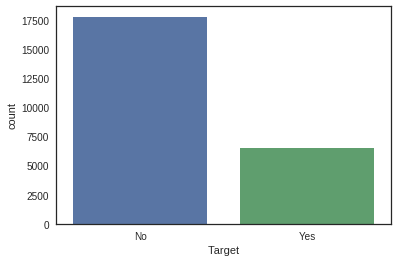

In [0]:
sns.countplot(x= "Target",data=Data)

In [0]:
del test['Target']

In [0]:
X_df = train.drop('Target', axis = 1)
X_df
Y_df = train['Target']
Y_df

0         No
1        Yes
2         No
3         No
4        Yes
5        Yes
6         No
7         No
8         No
9         No
10       Yes
11        No
12        No
13        No
14        No
15       Yes
16        No
17       Yes
18        No
19        No
20       Yes
21        No
22        No
23        No
24       Yes
25       Yes
26        No
27        No
28        No
29        No
        ... 
24226     No
24227     No
24228     No
24229     No
24230    Yes
24231    Yes
24232     No
24233    Yes
24234     No
24235     No
24236     No
24237     No
24238     No
24239     No
24240     No
24241     No
24242    Yes
24243     No
24244    Yes
24245     No
24246     No
24247    Yes
24248     No
24249     No
24250    Yes
24251    Yes
24252     No
24253    Yes
24254     No
24255     No
Name: Target, Length: 24256, dtype: object

In [0]:
print (X_df.shape)
print (test.shape)

(24256, 36)
(7257, 36)


## Missing Value Visualisation

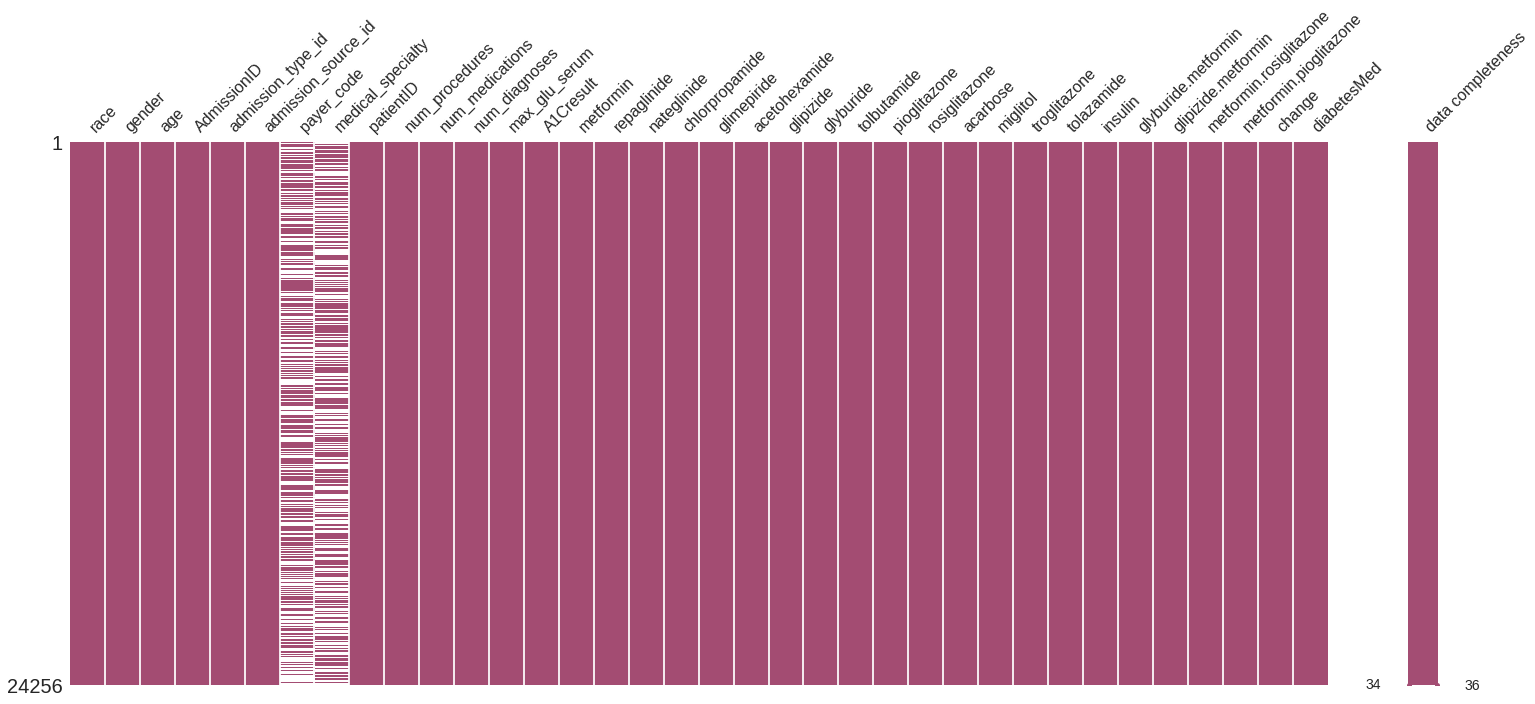

In [0]:
##Train dataset
plt.figure(figsize=(16,6))
msno.matrix(X_df,labels = True, color=(0.64,0.30,0.45))

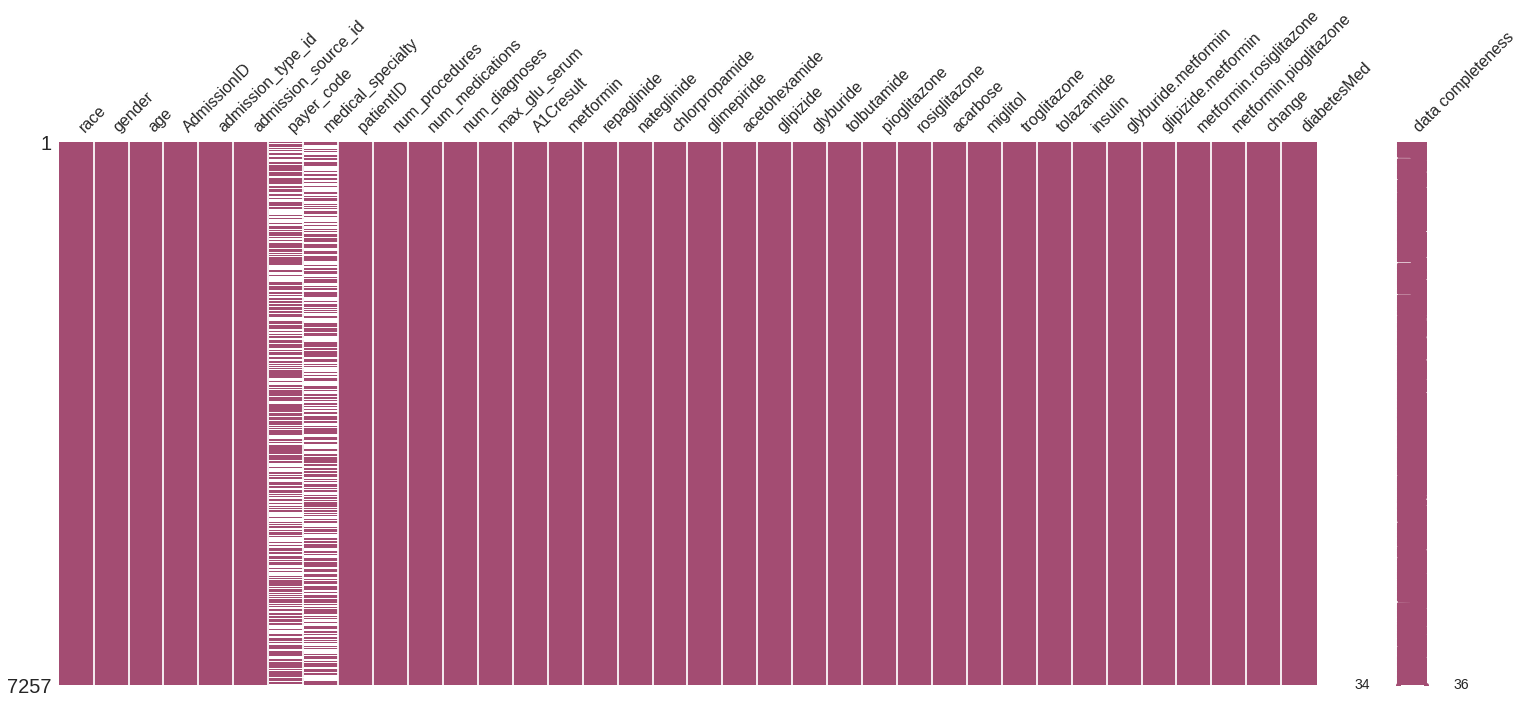

In [0]:
##Test Dataset
plt.figure(figsize=(16,6))
msno.matrix(test,labels = True, color=(0.64,0.30,0.45))

## Missing Value Immputation

In [0]:
##Train
X_df = X_df.drop("payer_code", axis = 1)   ##This Column is of no use
X_df.isnull().sum()

race                           0
gender                         0
age                            0
AdmissionID                    0
admission_type_id              0
admission_source_id            0
medical_specialty          11477
patientID                      0
num_procedures                 0
num_medications                0
num_diagnoses                  0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose                       0
miglitol                       0
troglitazone                   0
tolazamide                     0
insulin                        0
glyburide.metformin            0
glipizide.

### Here we can see that in X_df we have only one columns which contains na values

In [0]:
X_df.isnull().sum().sum()

11477

In [0]:
X_df = X_df.fillna(X_df["medical_specialty"].value_counts().index[0])

In [0]:
X_df.isnull().sum().sum()

0

In [0]:
##Test
test=  test.drop("payer_code", axis = 1)
test.isnull().sum().sum()

3461

### Here we can see that in test we have only two columns which contains na values

In [0]:
test = test.fillna(test["medical_specialty"].value_counts().index[0])
test.isnull().sum().sum()

0

## Again we will check our missing value through visualisation.

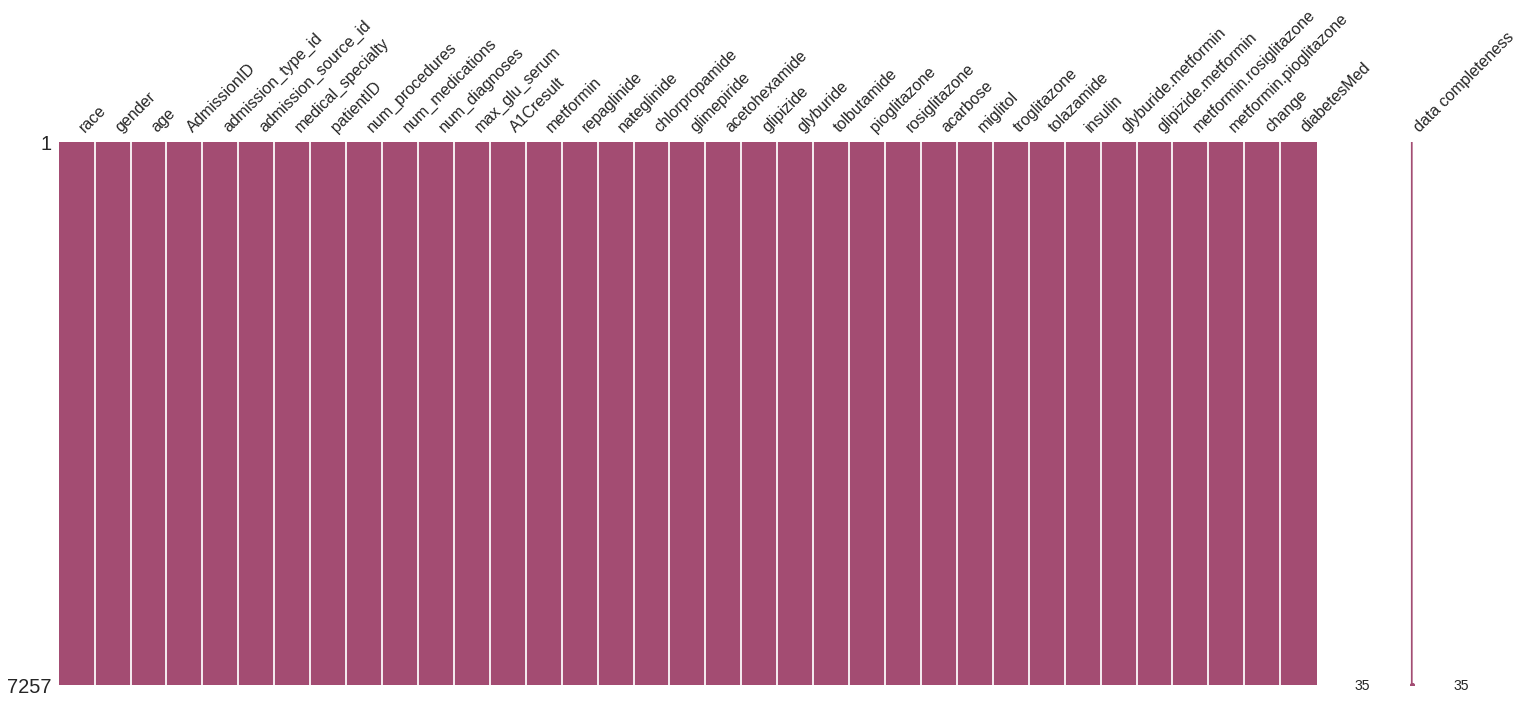

In [0]:
plt.figure(figsize=(16,6))
msno.matrix(test,labels = True, color=(0.64,0.30,0.45))

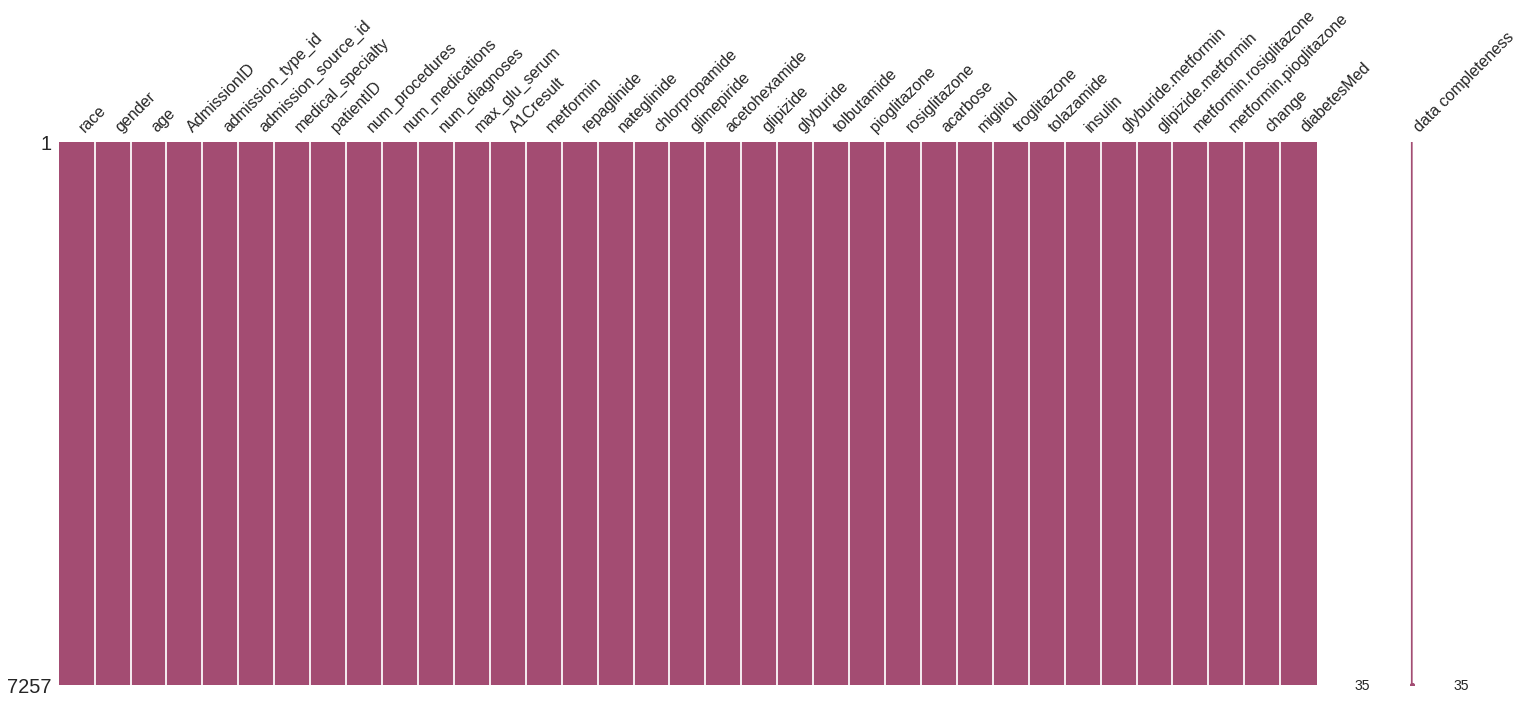

In [0]:
plt.figure(figsize=(16,6))
msno.matrix(test,labels = True, color=(0.64,0.30,0.45))

In [0]:
##Here we are converting all objects into integer
char_cols = X_df.dtypes.pipe(lambda x: x[x == 'object']).index

for c in char_cols:
    X_df[c] = pd.factorize(X_df[c])[0]
    

In [0]:
##Here we are converting all objects intointeger
char_cols = test.dtypes.pipe(lambda x: x[x == 'object']).index

for c in char_cols:
    test[c] = pd.factorize(test[c])[0]

In [0]:
print (X_df.shape)
print (test.shape)

(24256, 35)
(7257, 35)


## Now we will check multi collinearity

In [0]:
corr = X_df.corr()
corr

,race,gender,age,AdmissionID,admission_type_id,admission_source_id,medical_specialty,patientID,num_procedures,num_medications,...,miglitol,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed
race,1.000000,-0.023303,0.056782,-0.002327,-0.048591,-0.022998,0.009785,-0.002327,-0.033129,-0.060287,...,0.003470,-0.003154,-0.002635,0.000051,0.020420,-0.003154,NaN,-0.003154,-0.026064,-0.020933
gender,-0.023303,1.000000,0.007213,0.004465,0.008262,0.000243,0.003114,0.004465,0.064864,-0.012808,...,-0.003162,0.006746,0.005071,0.009163,0.002759,0.006746,NaN,-0.006111,-0.021522,-0.023549
age,0.056782,0.007213,1.000000,-0.002916,-0.003464,-0.016054,0.107685,-0.002916,-0.020801,-0.055741,...,0.005413,-0.004304,0.006360,0.035841,-0.004947,0.003125,NaN,-0.000589,-0.014763,-0.018724
AdmissionID,-0.002327,0.004465,-0.002916,1.000000,0.000260,0.000965,0.016632,1.000000,0.011238,0.008868,...,-0.003774,0.008644,-0.007703,0.007650,-0.002877,0.007193,NaN,0.006176,-0.000405,0.001199
admission_type_id,-0.048591,0.008262,-0.003464,0.000260,1.000000,0.088406,0.159979,0.000260,0.139459,0.108740,...,-0.005696,-0.004739,0.023563,0.036158,-0.004969,-0.004739,NaN,0.003967,0.009041,0.012857
admission_source_id,-0.022998,0.000243,-0.016054,0.000965,0.088406,1.000000,-0.100852,0.000965,-0.148870,-0.087784,...,-0.003198,0.002320,0.001407,0.020917,-0.020360,0.002320,NaN,-0.007054,0.011070,0.009604
medical_specialty,0.009785,0.003114,0.107685,0.016632,0.159979,-0.100852,1.000000,0.016632,0.042365,0.014339,...,-0.002762,-0.003435,0.002813,-0.025633,0.011113,0.000245,NaN,0.006686,0.011180,-0.008032
patientID,-0.002327,0.004465,-0.002916,1.000000,0.000260,0.000965,0.016632,1.000000,0.011238,0.008868,...,-0.003774,0.008644,-0.007703,0.007650,-0.002877,0.007193,NaN,0.006176,-0.000405,0.001199
num_procedures,-0.033129,0.064864,-0.020801,0.011238,0.139459,-0.148870,0.042365,0.011238,1.000000,0.418478,...,-0.000735,-0.005289,-0.000572,0.020108,0.001021,0.005657,NaN,-0.001640,-0.016342,-0.007284
num_medications,-0.060287,-0.012808,-0.055741,0.008868,0.108740,-0.087784,0.014339,0.008868,0.418478,1.000000,...,0.010648,0.001099,0.002996,0.127736,0.005306,0.004128,NaN,0.003370,-0.251938,-0.202576


In [0]:
# A condition to filter all the columns where collinearity with other columns is greater than 0.2 and less than 1.0
high_corr_attr = X_df[(corr>0.2) & (corr<1)].count().sort_values(ascending= False)

In [0]:
cols_to_be_dropped = list(high_corr_attr[high_corr_attr > 5].index)

In [0]:
len(cols_to_be_dropped)

0

In [0]:
X_df.drop(cols_to_be_dropped, axis = 1, inplace= True) # Dropping columns

In [0]:
X_df.shape

(24256, 35)

In [0]:
#sns.clustermap(X_df,linecolor="white", linewidth= 1)                      ##cluster map

In [0]:
#fig, ax = plt.subplots(figsize=(18,18))     ##this helps us to make a canvas
#corr = X_df.corr()
#mask = np.zeros_like(corr, dtype=np.bool)
#ask[np.triu_indices_from(mask)] = True
#sns.heatmap(corr,square=False, linewidths=.5, cbar_kws={"shrink": .5}) #annot= True)

## Test and Split Data

In [0]:
X = X_df.values
Y = Y_df.values

print (X.shape)
print (Y.shape)

(24256, 35)
(24256,)


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [0]:
print (X_train.shape)
print (Y_train.shape)

(18192, 35)
(18192,)


In [0]:
print (X_test.shape)
print (Y_test.shape)

(6064, 35)
(6064,)


#### Our data is not imbalance, now we will check this in terms of %

In [0]:
# now let us check in the number of Percentage
not_readmitted= len(train[train["Target"]=="No"]) 
readmitted = len(train[train["Target"]=="Yes"])
Percentage_of_not_readmitted = not_readmitted/(not_readmitted+readmitted)
print("percentage_of_not_readmitted",Percentage_of_not_readmitted *100)
Percentage_of_readmitted = readmitted/(not_readmitted/readmitted+not_readmitted)
print("percentage_of_readmitted",Percentage_of_readmitted*100)

percentage_of_not_readmitted 73.32618733509236
percentage_of_readmitted 36.37130414109761


1. Hence in data there is only 36.37 % are the readmitted while 73.3261% are not_readmitted.
2. So now we can say that there no need of resampling of the data

## Now we will apply models.

## 1. Random forest

In [0]:
##Random Forest
rfc = RandomForestClassifier(n_estimators=600)

In [0]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation
Let's predict off the y_val values and evaluate our model.

In [0]:
predictions1 = rfc.predict(X_test)
#predictions01 = rfc.predict(X_df)

## Now create a classification report from the results. 

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(classification_report(Y_test,predictions1))

             precision    recall  f1-score   support

         No       0.73      0.99      0.84      4421
        Yes       0.31      0.01      0.02      1643

avg / total       0.62      0.73      0.62      6064



## Show the Confusion Matrix for the predictions.

In [0]:
print(confusion_matrix(Y_test,predictions1))

[[4385   36]
 [1627   16]]


In [0]:
Test = test.values
print( test.shape)
test_pred = rfc.predict(test)
test_pred
Y_pred = pd.DataFrame(test_pred, index = test.index, columns=['Target'])
Y_pred['Target'] = Y_pred['Target'].replace({0: 'No',1:'Yes'})
Y_pred.head()

(7257, 35)


,Target
24256,No
24257,Yes
24258,No
24259,No
24260,Yes


 ## Writing to csv file

In [0]:
test_result = pd.DataFrame(Y_pred, index = test.index, columns = ['Target'])
test_result.to_csv('test_Result_random.csv', sep=',')

## 2. Logistic Model

In [0]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
predictions2 = logmodel.predict(X_test)
#predictions03 = logmodel.predict(X_df)

## Evaluation

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(Y_val,predictions2))

             precision    recall  f1-score   support

         No       0.73      1.00      0.84      4421
        Yes       0.00      0.00      0.00      1643

avg / total       0.53      0.73      0.61      6064



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [0]:
#accuracy(Y_val, predictions)
accuracy_score(Y_test, predictions2)

0.7290567282321899

In [0]:
Test = test.values

In [0]:
print( test.shape)

(7257, 35)


In [0]:
test_pred = logmodel.predict(test)
test_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [0]:
Y_pred1 = pd.DataFrame(test_pred, index = test.index, columns=['Target'])
Y_pred1['Target'] = Y_pred1['Target'].replace({0: 'No',1:'Yes'})
Y_pred1.head()

,Target
24256,No
24257,Yes
24258,No
24259,No
24260,Yes


## Writing result to csv file

In [0]:
test_result = pd.DataFrame(Y_pred1, index = test.index, columns = ['Target'])
test_result.to_csv('test_Result_log1.csv', sep=',')

## 3. Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree = DecisionTreeClassifier()

In [0]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and evaluation

In [0]:
predictions3 = dtree.predict(X_test)
#predictions04 = dtree.predict(X_df)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(classification_report(Y_test,predictions3))

             precision    recall  f1-score   support

         No       1.00      1.00      1.00      4421
        Yes       1.00      1.00      1.00      1643

avg / total       1.00      1.00      1.00      6064



In [0]:
accuracy_score(Y_test, predictions3)

1.0

In [0]:
print(confusion_matrix(Y_test,predictions3))

[[4421    0]
 [   0 1643]]


In [0]:
Test = test.values
print( test.shape)
test_pred = dtree.predict(test)
test_pred
Y_pred2 = pd.DataFrame(test_pred, index = test.index, columns=['Target'])
Y_pred2['Target'] = Y_pred2['Target'].replace({0: 'No',1:'Yes'})
Y_pred2.head()

(7257, 35)


,Target
24256,No
24257,Yes
24258,No
24259,No
24260,Yes


In [0]:
test_result = pd.DataFrame(Y_pred2, index = test.index, columns = ['Target'])
test_result.to_csv('test_Result_dt.csv', sep=',')

# **4. XGBoost**

In [0]:
from xgboost import XGBClassifier

In [0]:
#Fitting Xgboost to the training set
XB = XGBClassifier()
XB.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# Prediction and Evaluation

In [0]:
##Predict the test set result
predictions4 = XB.predict(X_test)
#predictions02 = XB.predict(X_df)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



# Now create a classification report from the results.

In [0]:
print(classification_report(Y_test,predictions4))
#f1_score(Y_test, predictions2)

             precision    recall  f1-score   support

         No       0.73      1.00      0.84      4421
        Yes       0.25      0.00      0.00      1643

avg / total       0.60      0.73      0.61      6064



In [0]:
accuracy_score(Y_test, predictions4)

0.7287269129287599

In [0]:
print(confusion_matrix(Y_test,predictions4))

[[4418    3]
 [1642    1]]


In [0]:
Test = test.values
print( test.shape)
test_pred = dtree.predict(test)
test_pred
Y_pred3 = pd.DataFrame(test_pred, index = test.index, columns=['Target'])
Y_pred3['Target'] = Y_pred2['Target'].replace({0: 'No',1:'Yes'})
Y_pred3.head()

(7257, 35)


,Target
24256,No
24257,Yes
24258,No
24259,No
24260,Yes


In [0]:
test_result = pd.DataFrame(Y_pred3, index = test.index, columns = ['Target'])
test_result.to_csv('test_Result_dt.csv', sep=',')